# Loading and Shaping Data in Python

#### First we will import the required libraries for the data work we need to conduct. 

In [1]:
import pandas as pd

#### In this case, our data is in a CSV file called 'filtered_WDIData.csv' which we created in the previous lesson, so we will use the pandas method .read_csv() to retrieve it. 

In [2]:
df = pd.read_csv('filtered_WDIData.csv')

#### Now that we've loaded data into our dataframe, we can use the pandas method .head() tp look at the first 5 rows of data.

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,5,398475,United States,USA,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,398476,United States,USA,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,398477,United States,USA,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,NaN
3,8,398478,United States,USA,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,NaN
4,9,398479,United States,USA,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,NaN


In [4]:
df.shape

(1575, 64)

#### We've picked up an extra column which was the index from our old dataframe. Let's remove it. Since we are just working with the US we can also remove Country Name and Country Code.

In [5]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Country Name', 'Country Code'], axis=1)
df.head()

,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,NaN
3,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,NaN
4,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,NaN


#### Currently each year is a separate column, while each indicator is a separate row. To make analysis easier in most analytics tools, we will want to make the a column called 'Year', where each row is a year and contains other columns contain indicator values. This is the pivot technique we've learned about, though in pandas it is called pd.melt().

In [6]:
df = pd.melt(df, id_vars=['Indicator Name', 'Indicator Code'])

In [7]:
df.head()

,Indicator Name,Indicator Code,variable,value
0,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,1960,NaN
1,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,1960,NaN
2,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
3,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
4,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960,NaN


The year column is now called 'variable'. Let's change this to 'Year' and rename 'value' to 'Value'.

In [8]:
df = df.rename(index=str, columns={"variable": "Year", 'value' : 'Value'})

We can further play with the data by assigning a single 

In [9]:
births=df[df['Indicator Code'] == 'SP.DYN.CBRT.IN']
births

,Indicator Name,Indicator Code,Year,Value
141,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,23.7
1716,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1961,23.3
3291,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1962,22.4
4866,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1963,21.7
6441,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1964,21.1
8016,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1965,19.4
9591,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1966,18.4
11166,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1967,17.8
12741,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1968,17.6
14316,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1969,17.9


#### It looks like there are still some NaN values in this dataset. We can remove all these nulls using the pandas .dropna() method. In this case we will specify that axis=0 so we will drop rows and how='any' so we will drop any rows that contain a null value. First let's take a look at the shape of the data frame which will give a result in (rows, cols):

In [10]:
births.shape

(58, 4)

In [11]:
births.dropna(axis=0, how='any')

,Indicator Name,Indicator Code,Year,Value
141,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,23.7
1716,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1961,23.3
3291,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1962,22.4
4866,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1963,21.7
6441,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1964,21.1
8016,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1965,19.4
9591,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1966,18.4
11166,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1967,17.8
12741,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1968,17.6
14316,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1969,17.9


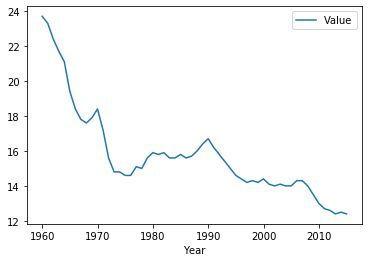

In [12]:
births.plot(x='Year',y='Value')

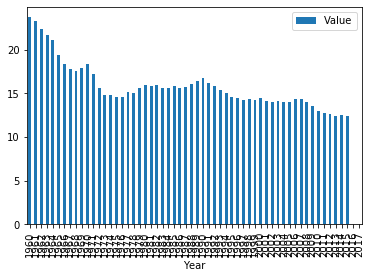

In [13]:
births.plot(x='Year',y='Value',kind="bar")

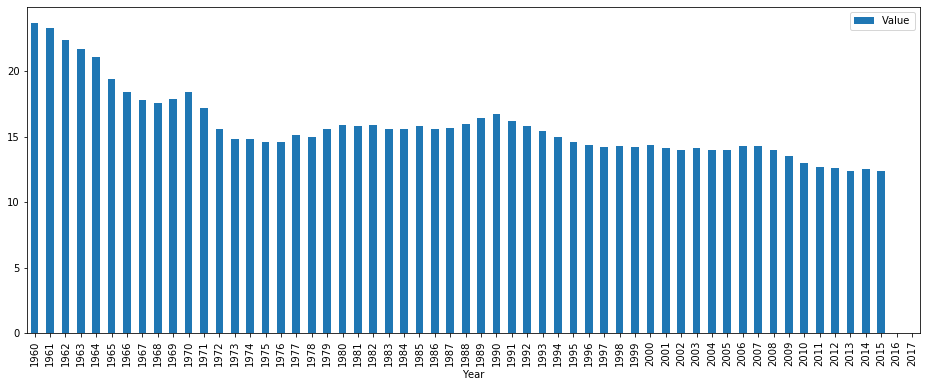

In [14]:
births.plot(x='Year',y='Value',kind="bar",figsize=(16,6))

Text(0, 0.5, 'Birth rate, crude (per 1,000 people)')

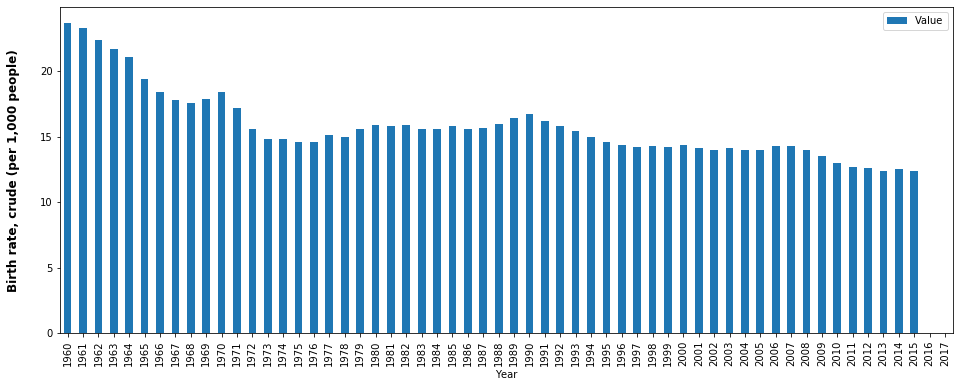

In [15]:
plt=births.plot(x='Year',y='Value',kind="bar",figsize=(16,6))
plt.set_ylabel("Birth rate, crude (per 1,000 people)", labelpad=20, weight='bold', size=12)

#### We can use a combination of pandas methods to see how many rows exist for each indicator after we removed the nulls. The .groupby() method will group rows by the values of a column, in this case Indicator Name, the .size() method will count the number of rows in each group, and the .sort_values(ascending=False) will sort the results in descending order.

In [16]:
df.groupby('Indicator Name').size().sort_values(ascending=False)

Indicator Name
Women's share of population ages 15+ living with HIV (%)     58
GDP deflator (base year varies by country)                   58
GDP growth (annual %)                                        58
GDP per capita (constant 2010 US$)                           58
GDP per capita (constant LCU)                                58
                                                             ..
PPG, bilateral concessional (DIS, current US$)               58
PPG, bilateral concessional (DOD, current US$)               58
PPG, bilateral concessional (INT, current US$)               58
PPG, bilateral concessional (NFL, current US$)               58
2005 PPP conversion factor, GDP (LCU per international $)    58
Length: 1575, dtype: int64

#### We've now cleaned up our data in a way that will be significantly smaller than when we started and much easier to work with in programs like Tableau. 

In [18]:
df

,Indicator Name,Indicator Code,Year,Value
0,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,1960,NaN
1,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,1960,NaN
2,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
3,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
4,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960,NaN
...,...,...,...,...
91345,Women who believe a husband is justified in be...,SG.VAW.GOES.ZS,2017,NaN
91346,Women who believe a husband is justified in be...,SG.VAW.NEGL.ZS,2017,NaN
91347,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,2017,NaN
91348,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,2017,NaN


#### Now let's output the results to csv.

In [19]:
df.to_csv('reshaped_US_WDIData.csv')